<a href="https://colab.research.google.com/github/kilaspintas/ai_project/blob/master/image_fundamental/ip_gradien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/kilaspintas/ai_project/master/Images/Folder%20Daun%20Jambu%20Biji/001.jpg --no-check-certificate

--2021-11-08 11:43:04--  https://raw.githubusercontent.com/kilaspintas/ai_project/master/Images/Folder%20Daun%20Jambu%20Biji/001.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358127 (350K) [image/jpeg]
Saving to: ‘001.jpg’

001.jpg             100%[===================>] 349.73K  --.-KB/s    in 0.03s   

2021-11-08 11:43:05 (10.2 MB/s) - ‘001.jpg’ saved [358127/358127]



In [2]:
# import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
import cv2

Function to display images in Jupyter Notebooks and Google Colab


In [3]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

Implementing Sobel and Scharr kernels with OpenCV


In [4]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", type=str, required=True,
# 	help="path to input image")
# ap.add_argument("-s", "--scharr", type=int, default=0,
# 	help="path to input image")

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "001.jpg",
    "scharr": 0
}

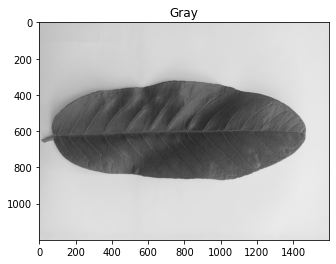

In [5]:
# load the image, convert it to grayscale, and display the original
# grayscale image
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt_imshow("Gray", gray)

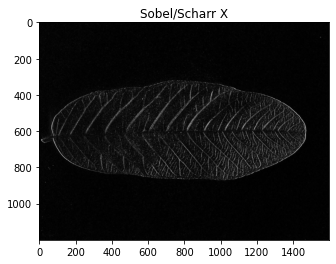

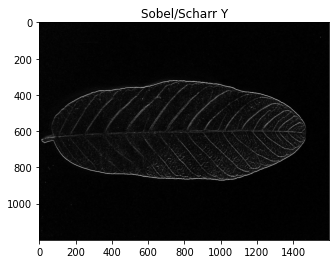

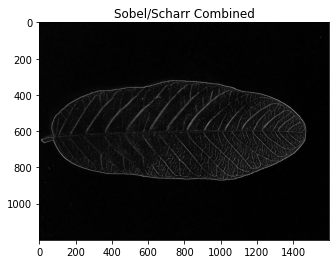

In [6]:
# set the kernel size, depending on whether we are using the Sobel
# operator of the Scharr operator, then compute the gradients along
# the x and y axis, respectively
ksize = -1 if args["scharr"] > 0 else 3
gX = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=ksize)
gY = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=ksize)

# the gradient magnitude images are now of the floating point data
# type, so we need to take care to convert them back a to unsigned
# 8-bit integer representation so other OpenCV functions can operate
# on them and visualize them
gX = cv2.convertScaleAbs(gX)
gY = cv2.convertScaleAbs(gY)

# combine the gradient representations into a single image
combined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)

# show our output images
plt_imshow("Sobel/Scharr X", gX)
plt_imshow("Sobel/Scharr Y", gY)
plt_imshow("Sobel/Scharr Combined", combined)

Computing gradient magnitude and orientation with OpenCV


In [7]:
# load the input image and convert it to grayscale
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# compute gradients along the x and y axis, respectively
gX = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
gY = cv2.Sobel(gray, cv2.CV_64F, 0, 1)

# compute the gradient magnitude and orientation
magnitude = np.sqrt((gX ** 2) + (gY ** 2))
orientation = np.arctan2(gY, gX) * (180 / np.pi) % 180

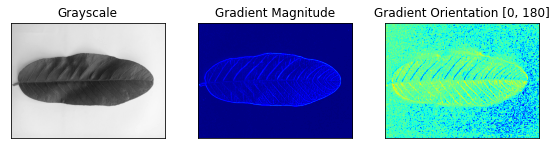

In [8]:
# initialize a figure to display the input grayscale image along with
# the gradient magnitude and orientation representations, respectively
(fig, axs) = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))

# plot each of the images
axs[0].imshow(gray, cmap="gray")
axs[1].imshow(magnitude, cmap="jet")
axs[2].imshow(orientation, cmap="jet")

# set the titles of each axes
axs[0].set_title("Grayscale")
axs[1].set_title("Gradient Magnitude")
axs[2].set_title("Gradient Orientation [0, 180]")

# loop over each of the axes and turn off the x and y ticks
for i in range(0, 3):
	axs[i].get_xaxis().set_ticks([])
	axs[i].get_yaxis().set_ticks([])

# show the plots
plt.tight_layout()
plt.show()